## EDA on Census Income Data

## Importing Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading dataset

In [186]:
columns=['Age','Workclass','Fnlwgt','Education','Education-num','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income'] 
df1=pd.read_csv("adult_data.csv",names=columns)
df1.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [187]:
df2=pd.read_csv("adult_test.csv",header=0,names=columns)
df2.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


## Concatenating the Datasets

In [188]:
d=[df1,df2]
df=pd.concat(d)
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Testing if an index contains duplicate values

In [189]:
df.index.is_unique
#This will return a boolean: True if the index is unique. False if there are duplicate values.

False

## Testing which values in an index are duplicate

In [190]:

df.index.duplicated()
#returns an array of boolean values to identify if a value has been encountered more than once.

array([False, False, False, ...,  True,  True,  True])

## Reset Index

In [191]:
df.reset_index(drop=True, inplace= True)  
#otherwise later will give "ValueError: cannot reindex on an axis with duplicate labels" error.
#drop parameter will drop the previous index column which had duplicate values
#inplace parameter is important because it will permanently change dataframe without creating copy.

In [192]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Income'],
      dtype='object')

In [193]:
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [194]:
df.shape

(48842, 15)

## Statistical conclusion

In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
Fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
Education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
Capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
Capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [196]:
df.describe(include='object').T

,count,unique,top,freq
Workclass,48842,9,Private,33906
Education,48842,16,HS-grad,15784
Marital-status,48842,7,Married-civ-spouse,22379
Occupation,48842,15,Prof-specialty,6172
Relationship,48842,6,Husband,19716
Race,48842,5,White,41762
Sex,48842,2,Male,32650
Native-country,48842,42,United-States,43832
Income,48842,4,<=50K,24720


## Making a copy of the data

In [197]:
data = df.copy()

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Hours-per-week  48842 non-null  int64 
 13  Native-country  48842 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Checking sample from the data

In [199]:
data.sample(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
40312,31,Private,159187,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,25,United-States,<=50K.
46077,37,Self-emp-not-inc,191841,Bachelors,13,Divorced,Other-service,Unmarried,White,Female,0,0,48,United-States,<=50K.
20597,29,Private,136017,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,48,United-States,<=50K
8026,42,Private,37937,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
8190,23,Private,227915,HS-grad,9,Never-married,Craft-repair,Unmarried,White,Female,0,0,33,United-States,<=50K
12078,25,Private,632834,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
3753,23,Private,162593,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K
7084,44,Local-gov,254146,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
9979,47,Local-gov,287320,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
21078,29,Private,164040,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


## Classifying Numeric and Categorical Features

In [200]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('{} numerical features : {}'.format(len(numeric_features), numeric_features))
print('{} categorical features : {}'.format(len(categorical_features), categorical_features))

6 numerical features : ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
9 categorical features : ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country', 'Income']


In [202]:
for col in categorical_features:
    print(data[col].value_counts(normalize=True)*100)
    print('-------------------------')

 Private             69.419762
 Self-emp-not-inc     7.907129
 Local-gov            6.420703
 ?                    5.730724
 State-gov            4.055935
 Self-emp-inc         3.470374
 Federal-gov          2.931903
 Without-pay          0.042996
 Never-worked         0.020474
Name: Workclass, dtype: float64
-------------------------
 HS-grad         32.316449
 Some-college    22.271815
 Bachelors       16.430531
 Masters          5.439990
 Assoc-voc        4.219729
 11th             3.709922
 Assoc-acdm       3.277917
 10th             2.843864
 7th-8th          1.955284
 Prof-school      1.707547
 9th              1.547848
 12th             1.345154
 Doctorate        1.216166
 5th-6th          1.042136
 1st-4th          0.505712
 Preschool        0.169936
Name: Education, dtype: float64
-------------------------
 Married-civ-spouse       45.819172
 Never-married            32.998239
 Divorced                 13.580525
 Separated                 3.132550
 Widowed                   3.

In [203]:
df['Workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64

## Replacing special characters

In [204]:
chars_to_remove=['?']
for item in chars_to_remove:
    for col in categorical_features:
        data[col] = data[col].apply(lambda x: np.nan if x.strip() == '?' else x) 

In [205]:
data

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [206]:
# Check NaN values
data.isnull().sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
Income               0
dtype: int64

## Checking Mode for columns with null values

In [207]:
data['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [208]:
data['Native-country'].mode()

0     United-States
Name: Native-country, dtype: object

In [209]:
data['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

## Handling Null values

In [214]:
data['Workclass'].fillna(data['Workclass'].mode(), inplace=True)

In [215]:
data['Native-country'].fillna(data['Native-country'].mode()[0], inplace=True)

In [216]:
data['Occupation'].fillna(data['Occupation'].mode()[0], inplace=True)

In [217]:
data.isnull().sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country       0
Income               0
dtype: int64

## Checking Duplicate Values

In [218]:
data.duplicated().sum()

29

## Dropping Duplicate Values

In [219]:
data=data.drop_duplicates()

In [220]:
data.shape

(48813, 15)

## Removing Spaces From the Dataset

In [221]:
data['Education'].unique() #space exists in dataset

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [222]:
for i in categorical_features:
    data[i]=data[i].str.strip()

In [223]:
data['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

# Univariate Analysis

In [224]:
data['Workclass'].value_counts()

Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: Workclass, dtype: int64

In [225]:
data['Workclass'] = data['Workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self-employed')
data['Workclass'] = data['Workclass'].replace(['Local-gov','State-gov','Federal-gov'],'Gov-employee')
data['Workclass'] = data['Workclass'].replace(['Without-pay','Never-worked'],'Not-working')

In [226]:
data['Workclass'].value_counts()

Private          33879
Gov-employee      6549
Self-employed     5555
Not-working         31
Name: Workclass, dtype: int64

<AxesSubplot:ylabel='Workclass'>

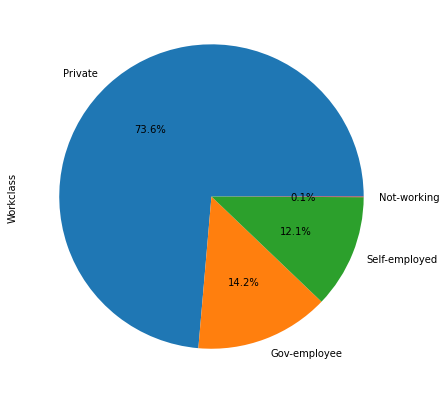

In [227]:
data["Workclass"].value_counts().plot.pie(y=data["Workclass"],figsize=(7,7),autopct='%.1f%%')

### Observation -- Most of the Census data says that Jobs lie in the private sector and it’s around 70%.

In [228]:
data['Marital-status'] = data['Marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')


In [229]:
data['Marital-status'].value_counts()

Married          23037
Never-married    16098
Divorced          6630
Separated         1530
Widowed           1518
Name: Marital-status, dtype: int64

<AxesSubplot:ylabel='Marital-status'>

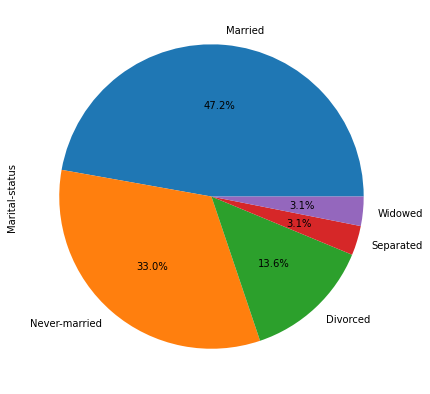

In [230]:
data["Marital-status"].value_counts().plot.pie(y=data["Marital-status"],figsize=(7,7),autopct='%.1f%%')

### Observation-- Most Working class people are married i.e. 46% of people are married and 32.8% of people never got married

<AxesSubplot:ylabel='Race'>

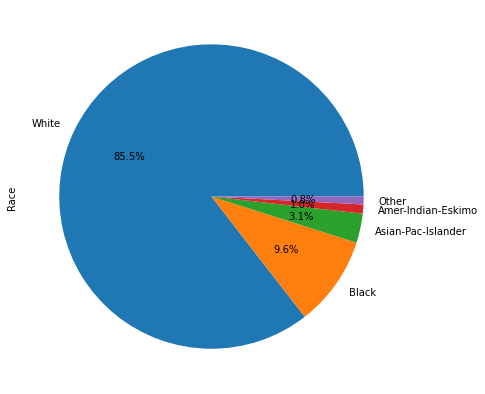

In [231]:
data["Race"].value_counts().plot.pie(y=data["Race"],figsize=(7,7),autopct='%.1f%%')

### Observation-- Most working people are Whites i.e. We can say that White People have supremacy over the Black while getting jobs 

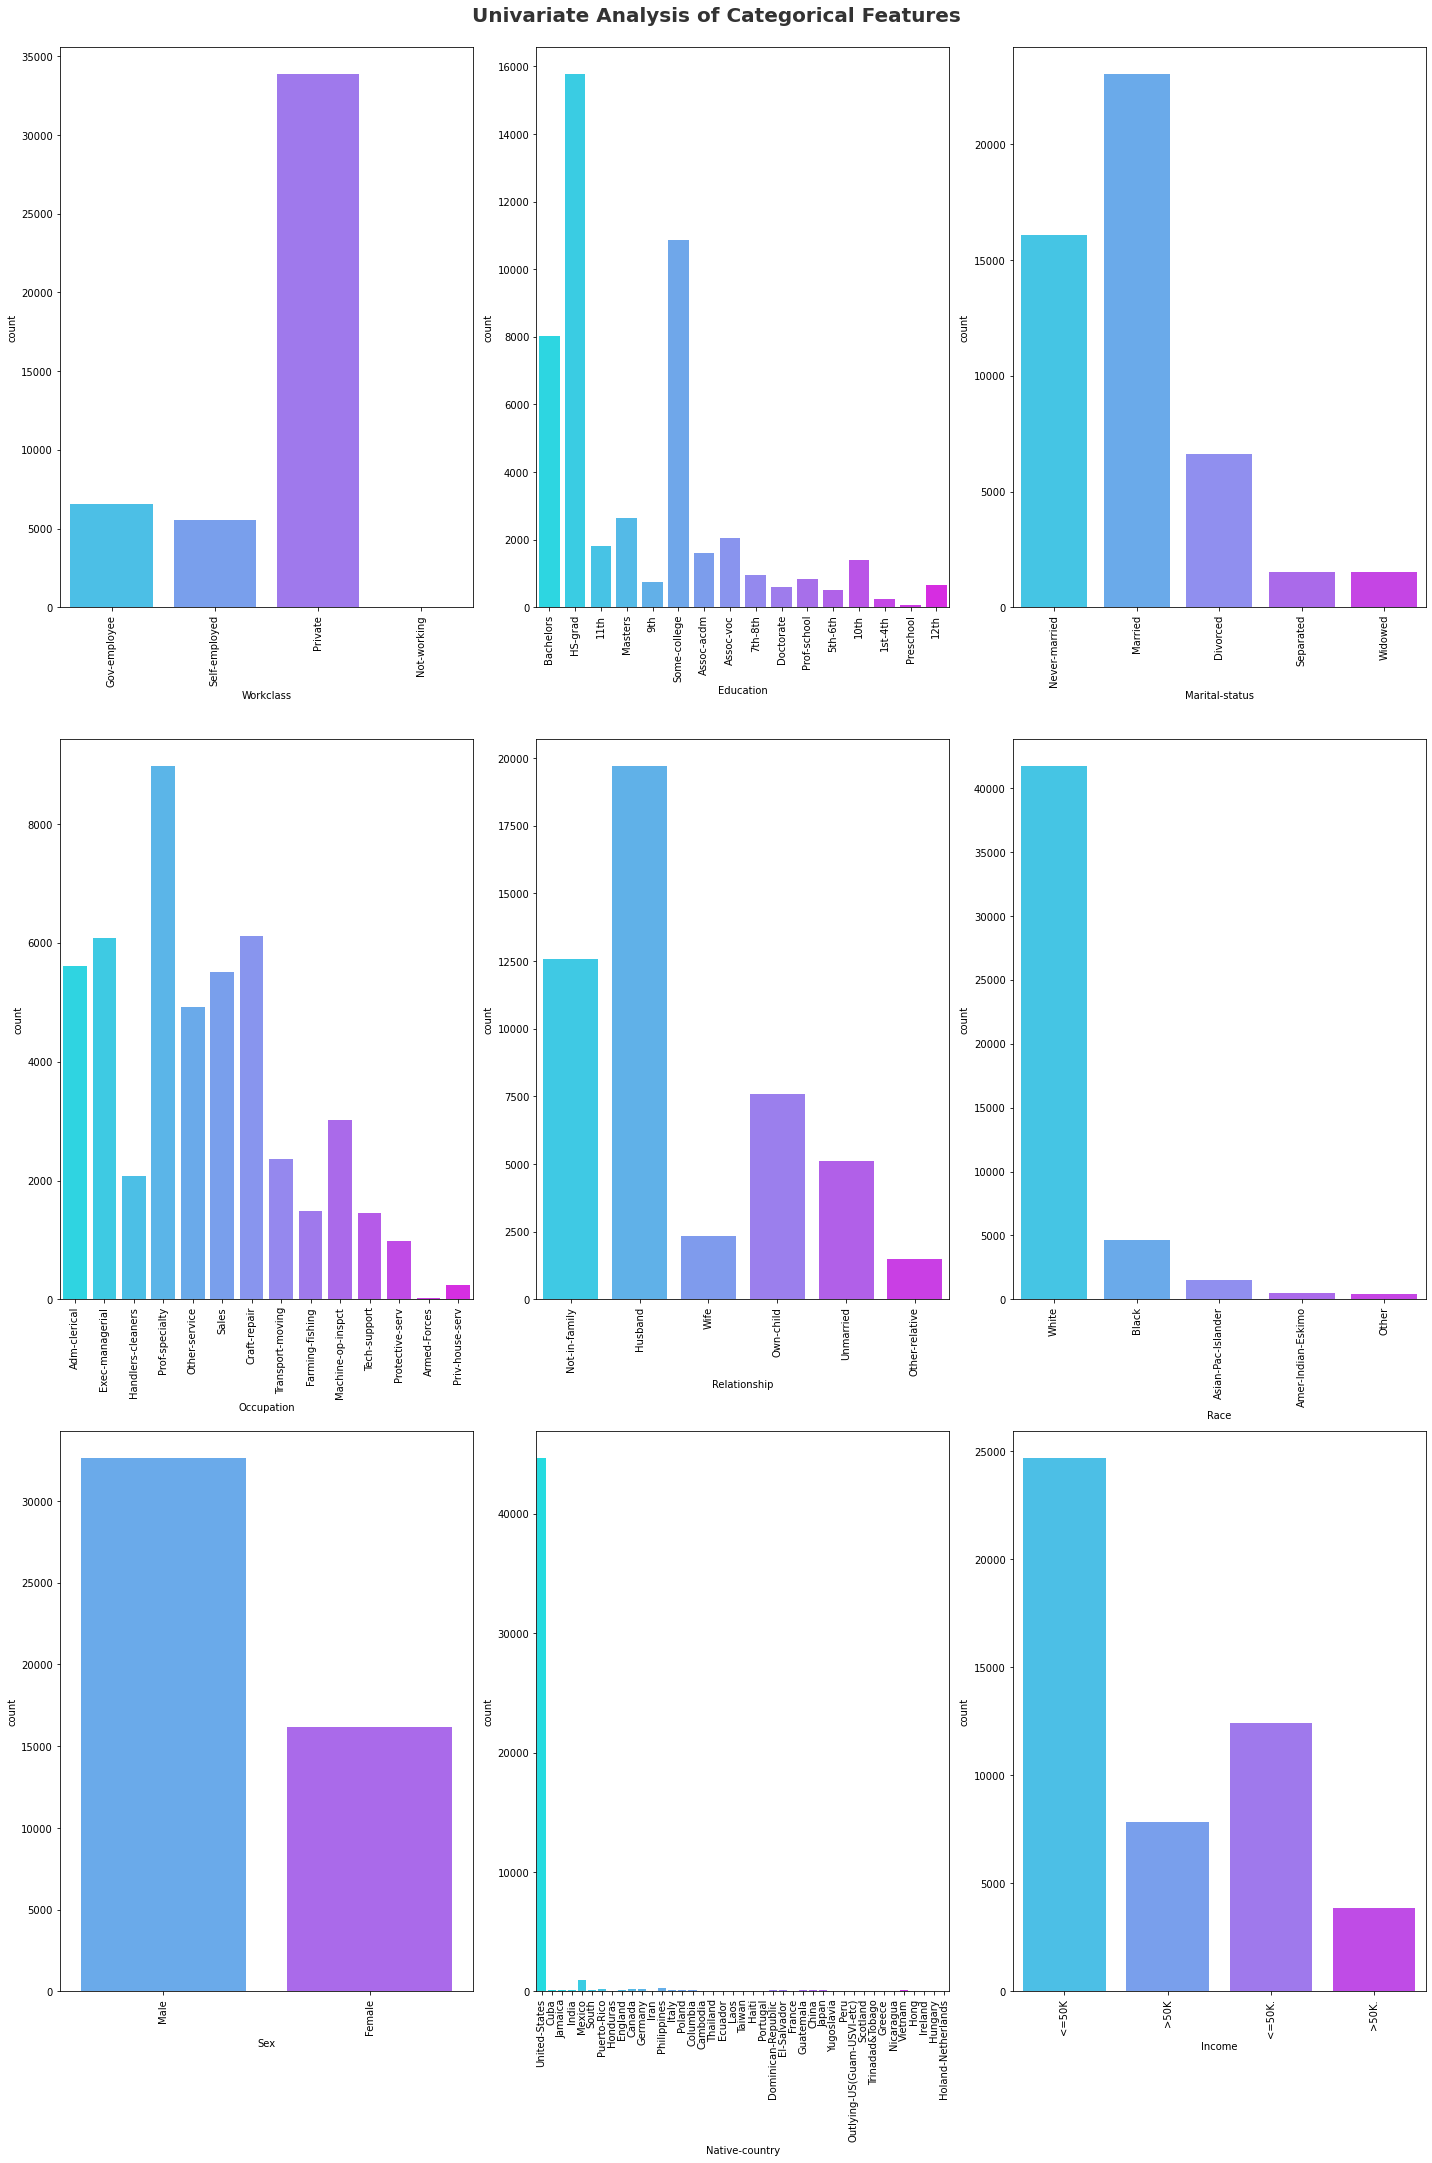

In [232]:
plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = categorical_features
for i in range(0, len(category)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=data[category[i]],palette="cool")
    plt.xlabel(category[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

Male      32631
Female    16182
Name: Sex, dtype: int64


<AxesSubplot:ylabel='Sex'>

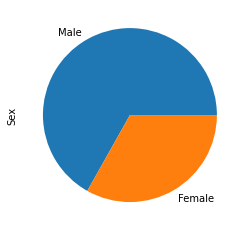

In [233]:
print(data.Sex.value_counts())
data.Sex.value_counts().plot.pie()

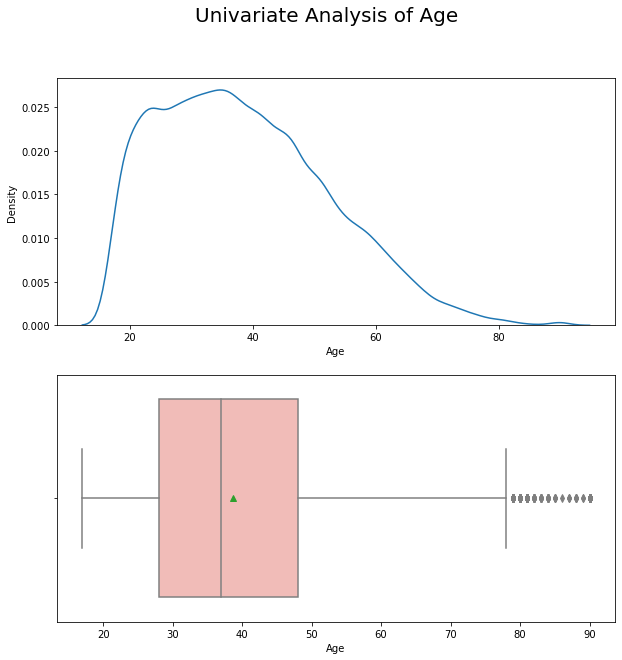

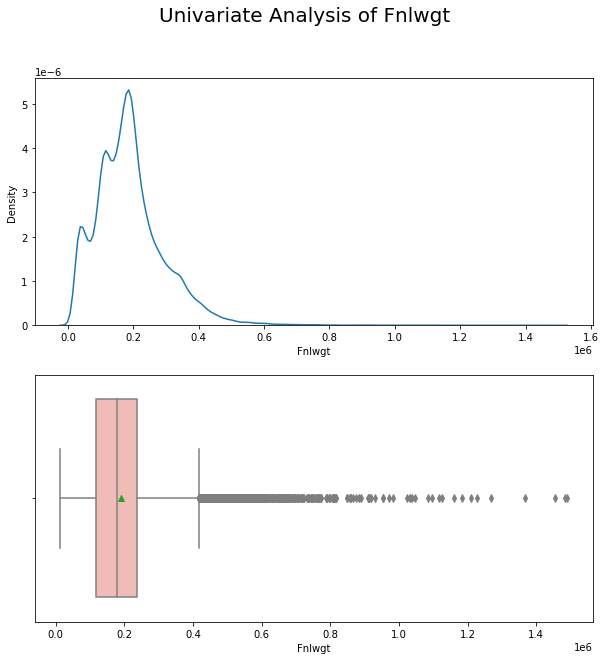

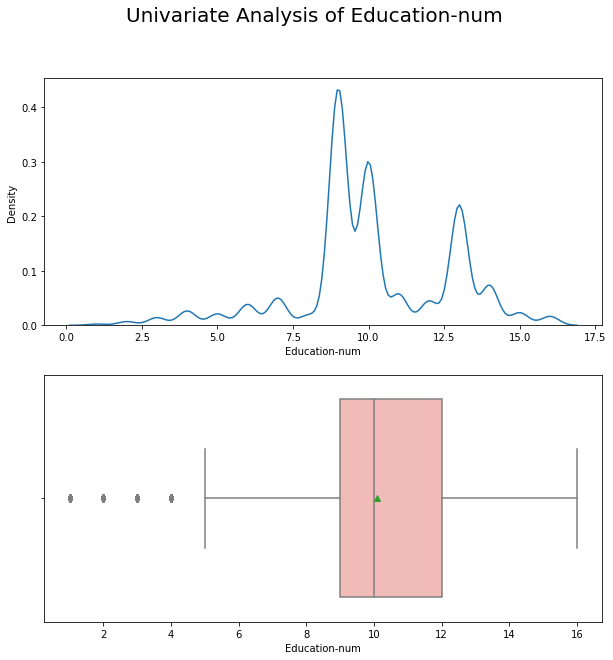

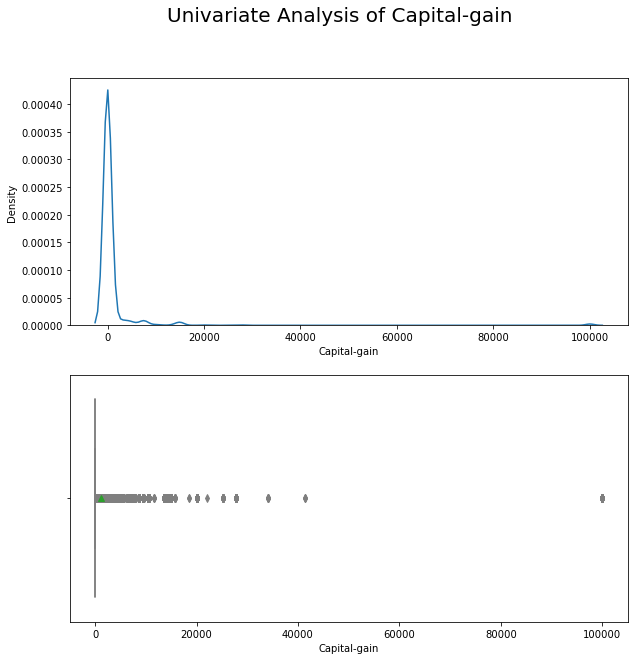

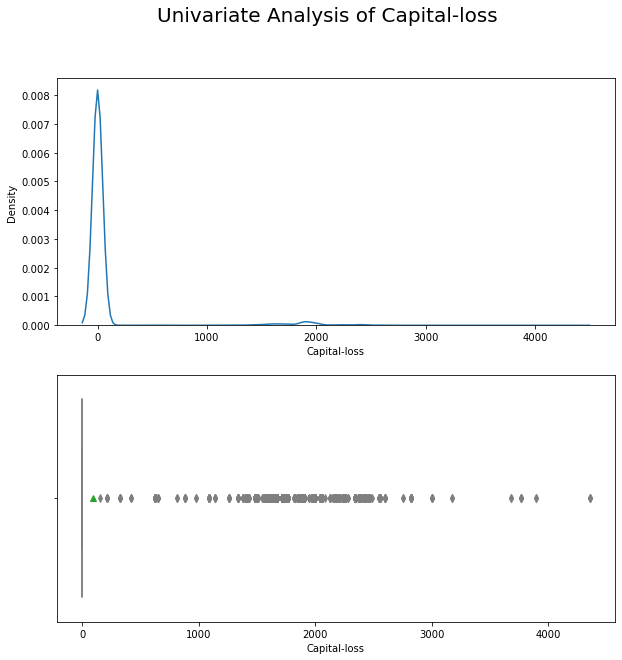

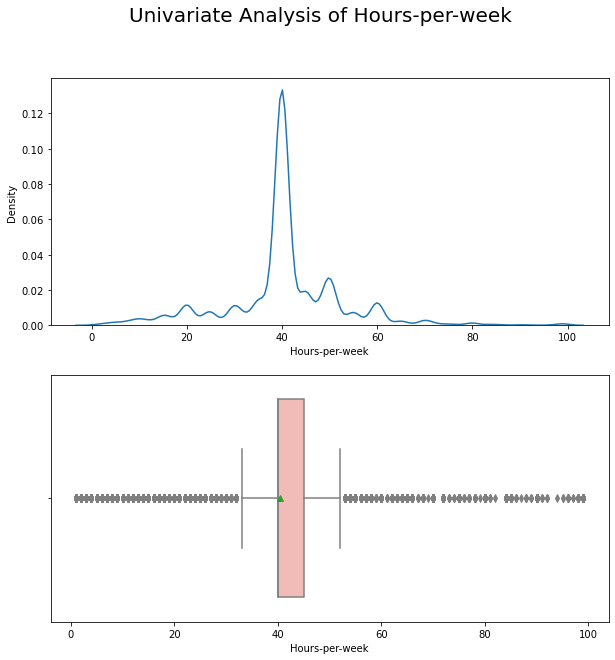

In [234]:
x_axis = numeric_features
for x in x_axis:
    fig,axes = plt.subplots(2,1,figsize=(10,10))
    sns.distplot(data[x], ax=axes[0], kde = True, hist=False)
    sns.boxplot(data[x], ax=axes[1], showmeans = True,palette="Pastel1")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=20)


### Observation--
Presence of Outliers in numeric features 

Age, Fnlwgt, Capital-gain and Capital-loss are Right skewed

## Bivariate Analysis

In [235]:
data['Income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [236]:
data['Income']=data['Income'].str.replace('.','')

In [237]:
data['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

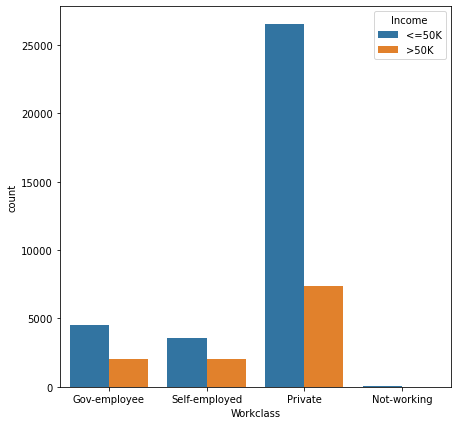

In [238]:
plt.figure(figsize=(7,7))
sns.countplot(x ='Workclass',hue='Income',data=data)

### Observation--

People earning more than 50K are Private Employees

<AxesSubplot:xlabel='Workclass', ylabel='Age'>

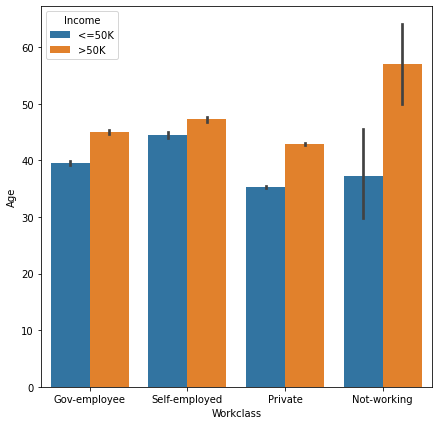

In [239]:
plt.figure(figsize=(7,7))
sns.barplot(x='Workclass',y='Age',hue='Income',data=data)

### Observation--

Self employed people are earning more at older age


<AxesSubplot:xlabel='Sex', ylabel='Hours-per-week'>

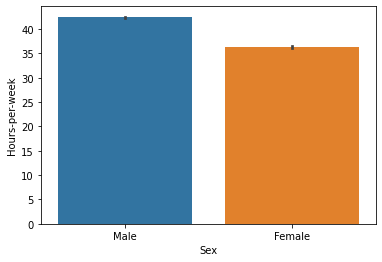

In [240]:
sns.barplot(x='Sex',y='Hours-per-week',data=data)

### Observation--
Males are working more hours per week than females

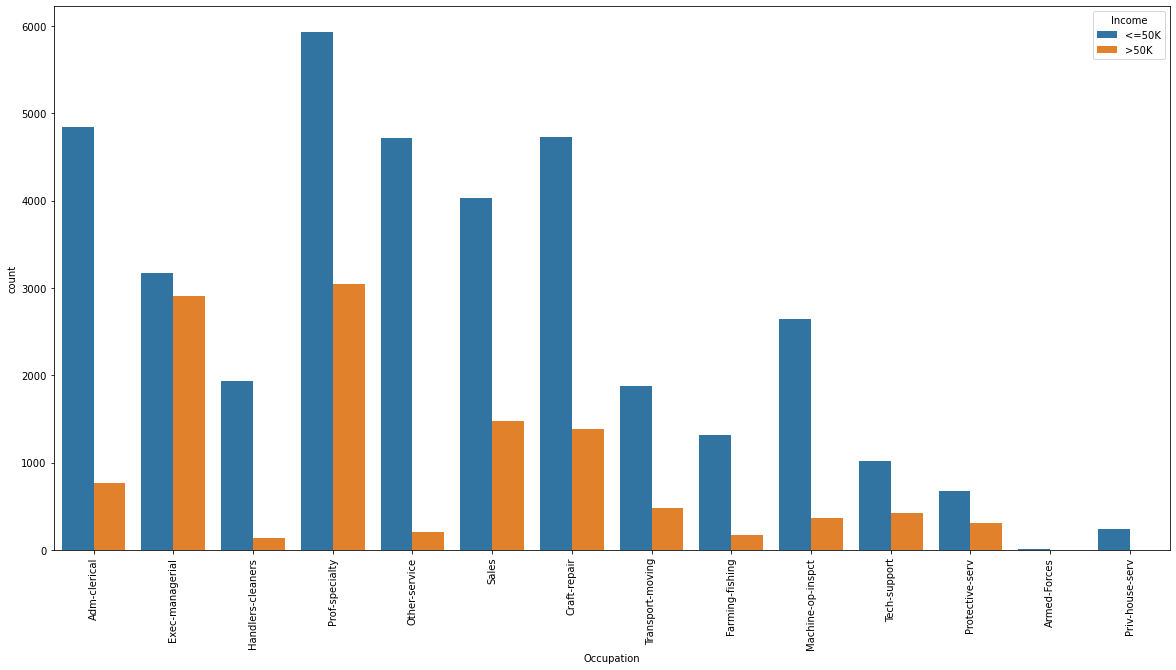

In [241]:
plt.figure(figsize=(20,10))
sns.countplot(x='Occupation',hue='Income',data=data)
plt.xticks(rotation=90)
plt.show()

### Observation--

More no. of people in Prof-Speciality occupation are earning more than 50K


In [242]:
print(numeric_features)

['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']


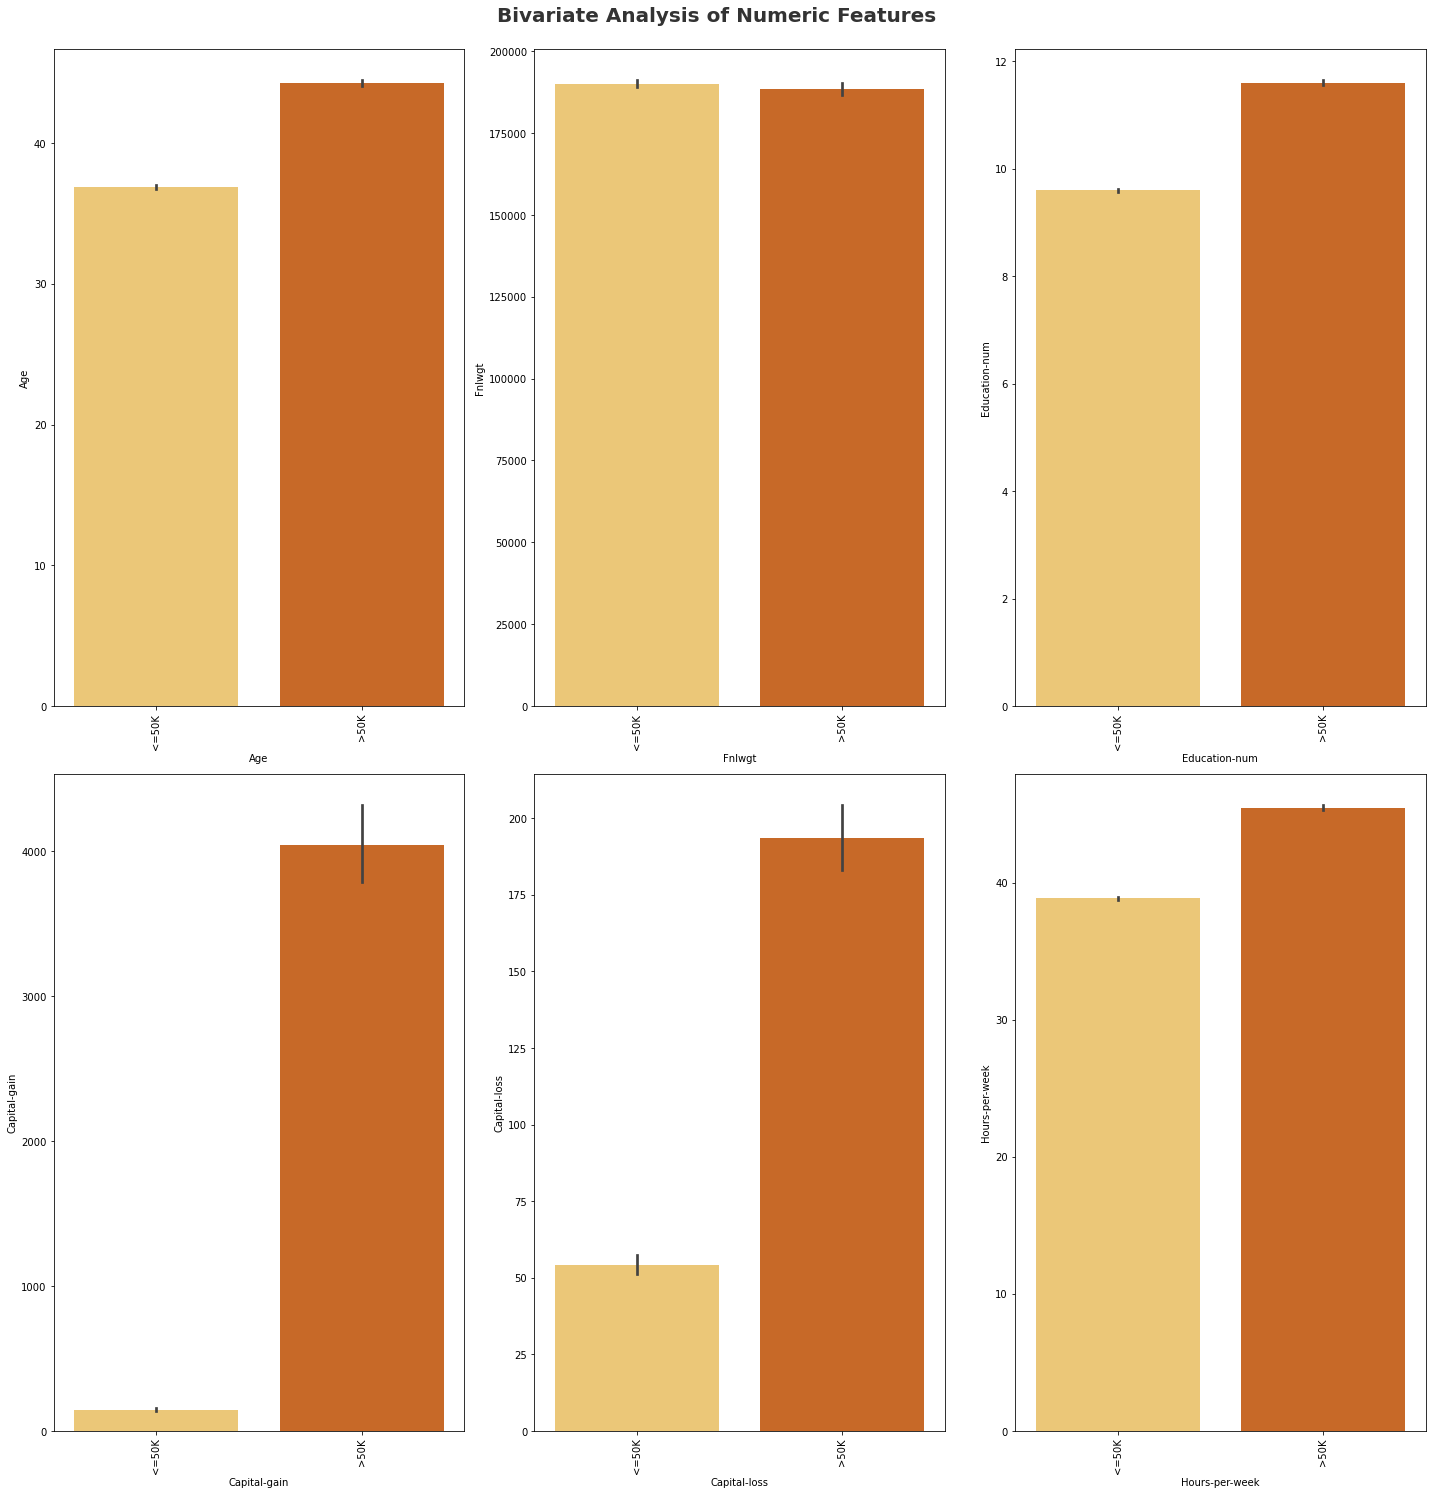

In [243]:
plt.figure(figsize=(20, 30))
plt.suptitle('Bivariate Analysis of Numeric Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
n=numeric_features
for i in range(0, len(n)):
    plt.subplot(3,3,i+1)
    sns.barplot(y=data[n[i]],x=data['Income'],palette="YlOrBr")
    plt.xlabel(n[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

### Observation-- 
Higher the experience, higher the income

Older people have more income

Higher Income,more capital invested thus more capital gain or capital loss

More working hours, higher the income

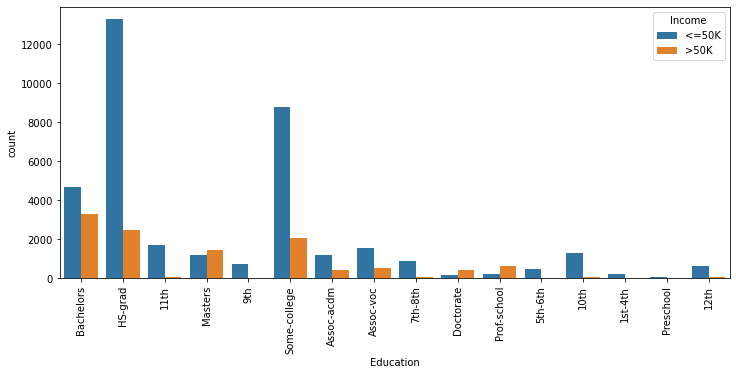

In [244]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education',hue='Income',data=data)
plt.xticks(rotation = 90)
plt.show()

### Observation--
Higher education have better chance of earning >50k

## Multivariate Analysis

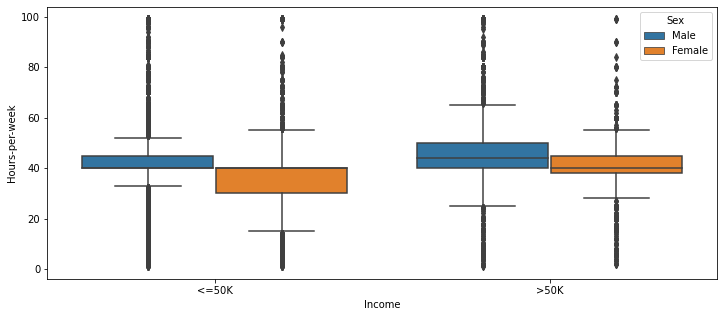

In [245]:
plt.figure(figsize=(12,5))
sns.boxplot(data['Income'],data['Hours-per-week'],hue=data['Sex'])
plt.show()

### Observation--
Average working hour of female is less compared to males.
However for income group >50k males have more flexible
working hrs compared to females.

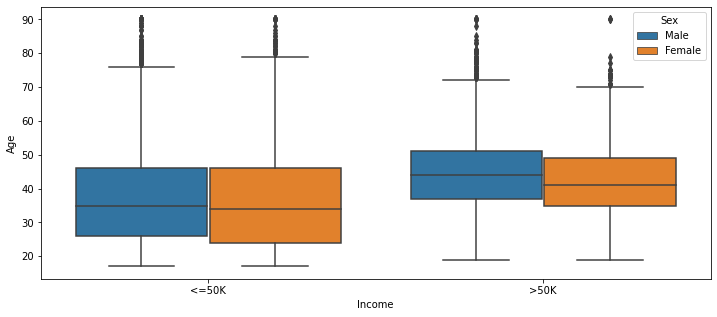

In [246]:
plt.figure(figsize=(12,5))
sns.boxplot(data['Income'],data['Age'],hue=data['Sex'])
plt.show()

### Observation--
Average age of female is less compared to males for income group >50k.

## Correlation 

In [248]:
data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.076474,0.030760,0.077221,0.056908,0.071322
Fnlwgt,-0.076474,1.000000,-0.038798,-0.003713,-0.004375,-0.013516
Education-num,0.030760,-0.038798,1.000000,0.125186,0.080969,0.143872
Capital-gain,0.077221,-0.003713,0.125186,1.000000,-0.031460,0.082154
Capital-loss,0.056908,-0.004375,0.080969,-0.031460,1.000000,0.054440
Hours-per-week,0.071322,-0.013516,0.143872,0.082154,0.054440,1.000000


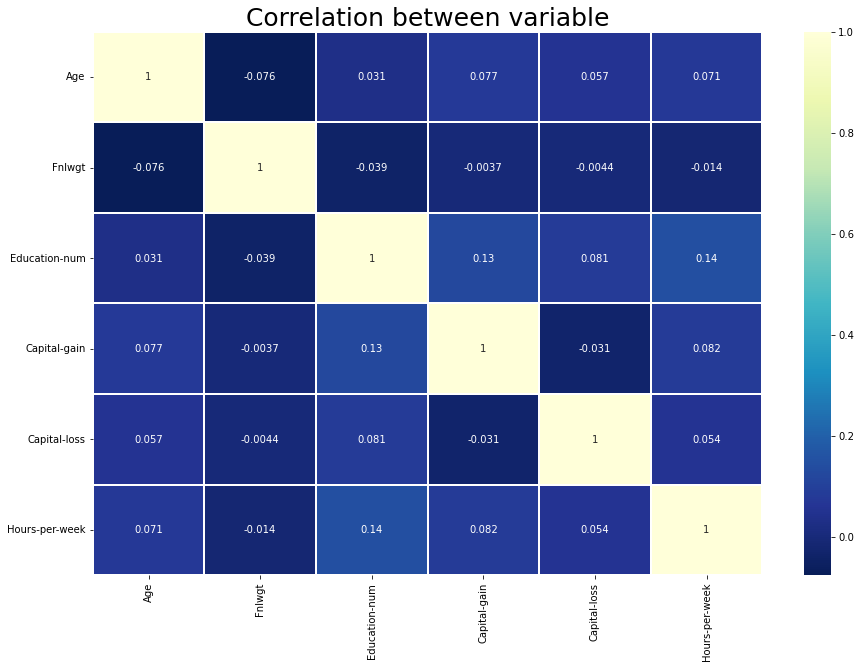

In [253]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu_r',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Correlation between variable",color='black',size=25)
plt.show()